In [106]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, confusion_matrix, recall_score


In [2]:
## Importing the dataset 
df = pd.read_csv("LOANDATA.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
## Checking for the null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#df.isnull().sum()
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
## Complete Case Analysis for Missing values less than 3% in the dataset
l=[col for col in df.columns if df[col].isnull().mean() <0.03 and df[col].isnull().mean()>0]
l

['Gender', 'Married', 'Dependents', 'Loan_Amount_Term']

In [8]:
df.dropna(subset = l[0:4], inplace=True)

In [9]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.410122
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.490401
Loan_Amount_Term     0.000000
Credit_History       8.551483
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Text(0.5, 1.0, 'No. of Dependents in Family')

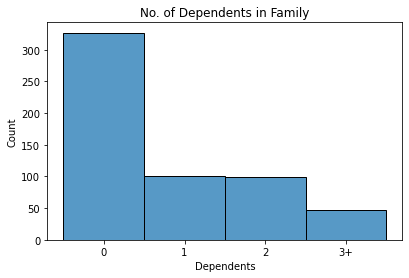

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Dependents'])
plt.title('No. of Dependents in Family')


Text(0.5, 1.0, 'Applicant-Income')

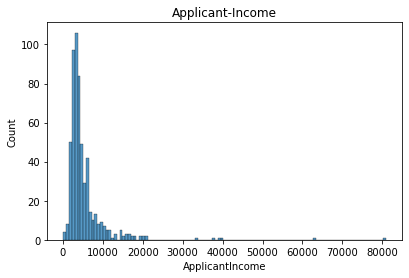

In [12]:
plt.figure(figsize=(14,4))

plt.subplot(122)
sns.histplot(df['ApplicantIncome'])
plt.title('Applicant-Income')


Text(0.5, 1.0, 'If Self-Employed')

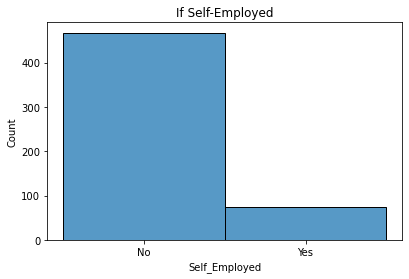

In [13]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Self_Employed'])
plt.title('If Self-Employed')

In [14]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.410122
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.490401
Loan_Amount_Term     0.000000
Credit_History       8.551483
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
def random_sampling_imputation(column):          
    non_missing_values = df[column].dropna()        
    random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
    df.loc[df[column].isnull(),column] = random_samples

In [16]:
random_sampling_imputation("Self_Employed")

In [17]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.490401
Loan_Amount_Term     0.000000
Credit_History       8.551483
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Text(0.5, 1.0, 'If Self-Employed')

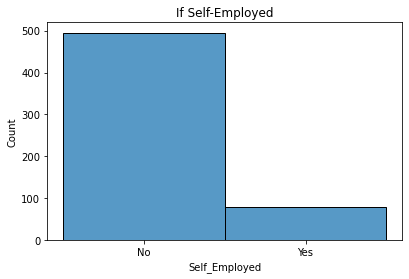

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Self_Employed'])
plt.title('If Self-Employed')

Text(0.5, 1.0, 'LoanAmount')

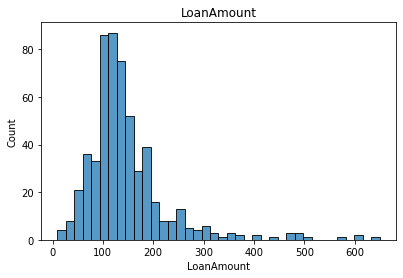

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['LoanAmount'])
plt.title('LoanAmount')

In [20]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [21]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.551483
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Text(0.5, 1.0, 'Credit_History')

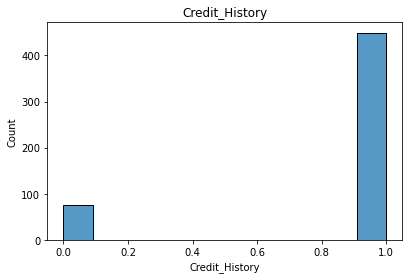

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Credit_History'])
plt.title('Credit_History')

In [23]:
random_sampling_imputation("Credit_History")

Text(0.5, 1.0, 'Credit_History')

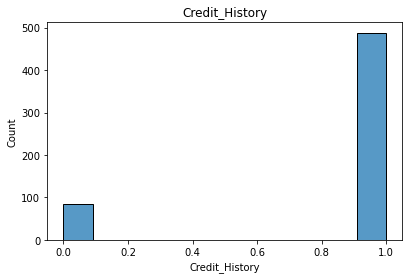

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Credit_History'])
plt.title('Credit_History')

In [25]:
### The missing values have been dealt with.
df.isnull().mean()*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Encoding 

In [27]:
## Checking the unique values in the columns
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = pd.get_dummies(df['Gender'])
df['Gender'] = ohe['Male']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
## Checking the unique values in the columns
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = pd.get_dummies(df['Married'])
df['Married'] = ohe['Yes']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
## Checking the unique values in the columns
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = pd.get_dummies(df['Education'])
df['Education'] = ohe['Graduate']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
## Checking the unique values in the columns
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Urban', 'Semiurban', 'Rural']])
df['Property_Area'] = encoder.fit_transform(df[['Property_Area']])
df['Property_Area'].unique()

array([0., 2., 1.])

In [36]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,No,5849,0.0,128.0,360.0,1.0,0.0,Y
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,2.0,N
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,No,2900,0.0,71.0,360.0,1.0,2.0,Y
610,LP002979,1,1,3+,1,No,4106,0.0,40.0,180.0,1.0,2.0,Y
611,LP002983,1,1,1,1,No,8072,240.0,253.0,360.0,1.0,0.0,Y
612,LP002984,1,1,2,1,No,7583,0.0,187.0,360.0,1.0,0.0,Y


In [37]:
## Checking the unique values in the columns
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = pd.get_dummies(df['Self_Employed'])
df['Self_Employed'] = ohe['Yes']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0.0,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2.0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,2.0,Y
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,2.0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0.0,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0.0,Y


In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Loan_Status'].unique()

array([1, 0])

In [40]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0.0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,2.0,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,2.0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0.0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0.0,1


In [41]:
df['Dependents'] = df['Dependents'].replace('3+', '3')

In [42]:
# df['Dependents'].unique()

count = df["Dependents"].value_counts()
print(count)

0    327
1    100
2     99
3     47
Name: Dependents, dtype: int64


In [43]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0.0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,2.0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,2.0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0.0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0.0,1


In [44]:
df.shape

(573, 13)

# Feature Scaling

In [45]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0.0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,2.0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,2.0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0.0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0.0,1


Text(0.5, 1.0, 'LoanAmount')

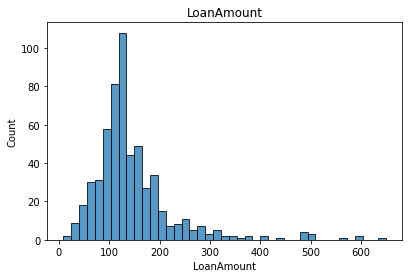

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['LoanAmount'])
plt.title('LoanAmount')

In [47]:
## Using Yeo-Johsnson Power Transformation method to change the distribution to Normal Distribution.
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Initialize PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df_transformed = pt.fit_transform(df[['LoanAmount']])
df['LoanAmount'] = df_transformed

Text(0.5, 1.0, 'LoanAmount')

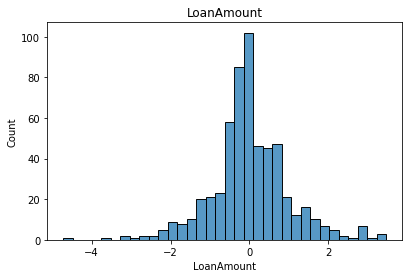

In [48]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['LoanAmount'])
plt.title('LoanAmount')

In [49]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,-0.025636,360.0,1.0,0.0,1
1,LP001003,1,1,1,1,0,4583,1508.0,-0.025636,360.0,1.0,2.0,0
2,LP001005,1,1,0,1,1,3000,0.0,-1.317964,360.0,1.0,0.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,-0.154874,360.0,1.0,0.0,1
4,LP001008,1,0,0,1,0,6000,0.0,0.169403,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,-1.179206,360.0,1.0,2.0,1
610,LP002979,1,1,3,1,0,4106,0.0,-2.244191,180.0,1.0,2.0,1
611,LP002983,1,1,1,1,0,8072,240.0,1.382523,360.0,1.0,0.0,1
612,LP002984,1,1,2,1,0,7583,0.0,0.747914,360.0,1.0,0.0,1


Text(0.5, 1.0, 'Gender')

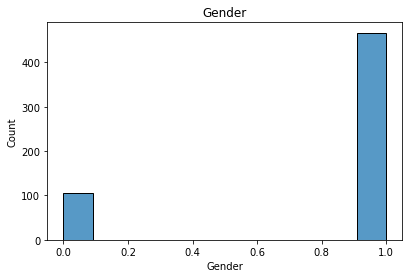

In [50]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Gender'])
plt.title('Gender')

Text(0.5, 1.0, 'Married')

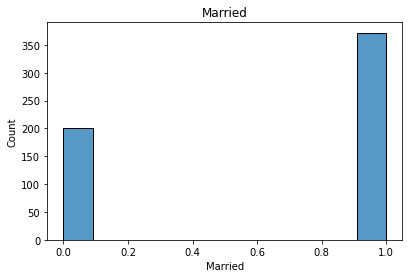

In [51]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Married'])
plt.title('Married')

Text(0.5, 1.0, 'Dependents')

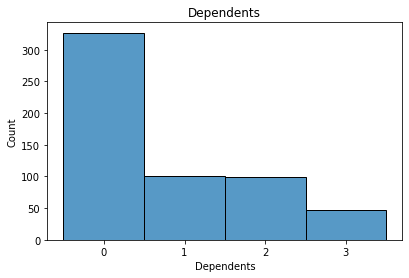

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Dependents'])
plt.title('Dependents')

Text(0.5, 1.0, 'Education')

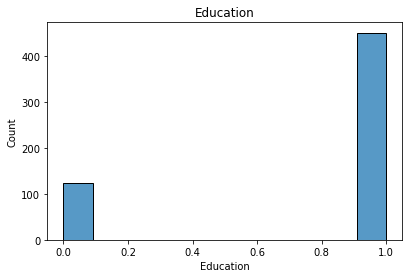

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Education'])
plt.title('Education')

Text(0.5, 1.0, 'Self_Employed')

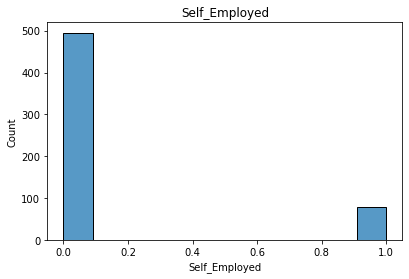

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Self_Employed'])
plt.title('Self_Employed')

Text(0.5, 1.0, 'ApplicantIncome')

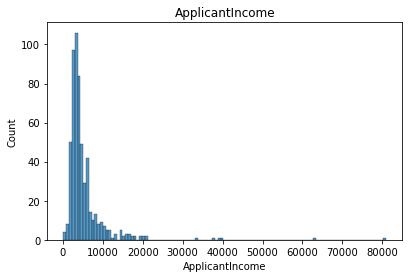

In [55]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['ApplicantIncome'])
plt.title('ApplicantIncome')

In [56]:
## Using Yeo-Johsnson Power Transformation method to change the distribution to Normal Distribution.
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Initialize PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df_transformed = pt.fit_transform(df[['ApplicantIncome']])
df['ApplicantIncome'] = df_transformed

Text(0.5, 1.0, 'ApplicantIncome')

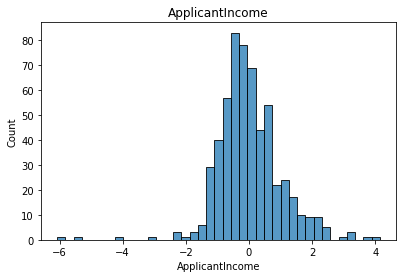

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['ApplicantIncome'])
plt.title('ApplicantIncome')

Text(0.5, 1.0, 'CoapplicantIncome')

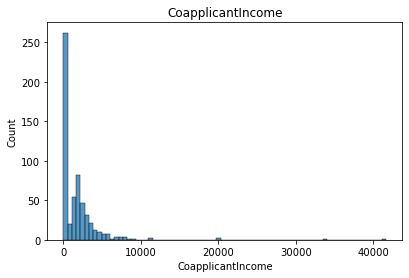

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['CoapplicantIncome'])
plt.title('CoapplicantIncome')

Text(0.5, 1.0, 'Loan_Amount_Term')

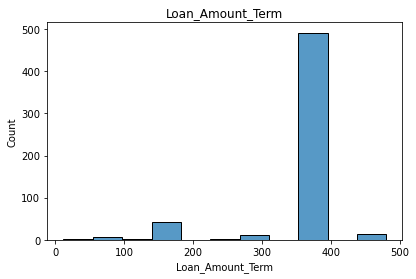

In [59]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Loan_Amount_Term'])
plt.title('Loan_Amount_Term')

Text(0.5, 1.0, 'Credit_History')

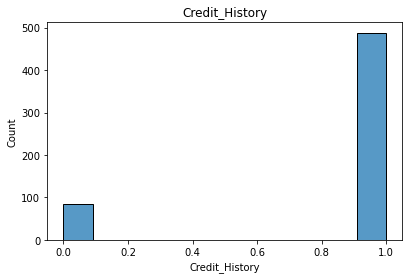

In [60]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Credit_History'])
plt.title('Credit_History')

Text(0.5, 1.0, 'Property_Area')

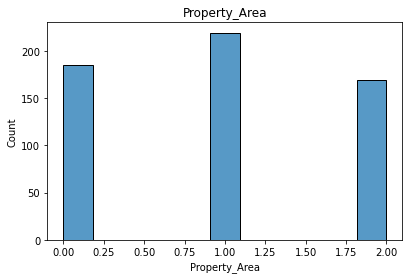

In [61]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Property_Area'])
plt.title('Property_Area')

In [62]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,0.554768,0.0,-0.025636,360.0,1.0,0.0,1
1,LP001003,1,1,1,1,0,0.176824,1508.0,-0.025636,360.0,1.0,2.0,0
2,LP001005,1,1,0,1,1,-0.499640,0.0,-1.317964,360.0,1.0,0.0,1
3,LP001006,1,1,0,0,0,-0.744733,2358.0,-0.154874,360.0,1.0,0.0,1
4,LP001008,1,0,0,1,0,0.593789,0.0,0.169403,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,-0.554873,0.0,-1.179206,360.0,1.0,2.0,1
610,LP002979,1,1,3,1,0,0.003821,0.0,-2.244191,180.0,1.0,2.0,1
611,LP002983,1,1,1,1,0,1.041449,240.0,1.382523,360.0,1.0,0.0,1
612,LP002984,1,1,2,1,0,0.948127,0.0,0.747914,360.0,1.0,0.0,1


In [63]:
from sklearn.preprocessing import MaxAbsScaler

features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Initializing the MaxAbsScaler
scaler = MaxAbsScaler()

# Fitting and transforming the scaler on the selected features
df[features] = scaler.fit_transform(df[features])

In [64]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.000000,1.0,0.0,0.554768,0.0,-0.025636,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,0.333333,1.0,0.0,0.176824,1508.0,-0.025636,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.000000,1.0,1.0,-0.499640,0.0,-1.317964,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.000000,0.0,0.0,-0.744733,2358.0,-0.154874,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.000000,1.0,0.0,0.593789,0.0,0.169403,360.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.000000,1.0,0.0,-0.554873,0.0,-1.179206,360.0,1.0,1.0,1
610,LP002979,1.0,1.0,1.000000,1.0,0.0,0.003821,0.0,-2.244191,180.0,1.0,1.0,1
611,LP002983,1.0,1.0,0.333333,1.0,0.0,1.041449,240.0,1.382523,360.0,1.0,0.0,1
612,LP002984,1.0,1.0,0.666667,1.0,0.0,0.948127,0.0,0.747914,360.0,1.0,0.0,1


In [65]:
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]

In [66]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,1.0,0.0,0.554768,0.0,-0.025636,360.0,1.0,0.0
1,1.0,1.0,0.333333,1.0,0.0,0.176824,1508.0,-0.025636,360.0,1.0,1.0
2,1.0,1.0,0.000000,1.0,1.0,-0.499640,0.0,-1.317964,360.0,1.0,0.0
3,1.0,1.0,0.000000,0.0,0.0,-0.744733,2358.0,-0.154874,360.0,1.0,0.0
4,1.0,0.0,0.000000,1.0,0.0,0.593789,0.0,0.169403,360.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,1.0,0.0,-0.554873,0.0,-1.179206,360.0,1.0,1.0
610,1.0,1.0,1.000000,1.0,0.0,0.003821,0.0,-2.244191,180.0,1.0,1.0
611,1.0,1.0,0.333333,1.0,0.0,1.041449,240.0,1.382523,360.0,1.0,0.0
612,1.0,1.0,0.666667,1.0,0.0,0.948127,0.0,0.747914,360.0,1.0,0.0


In [67]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 573, dtype: int64


In [95]:
## Splitting the dataset into test(30%) and train(70%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=1)

In [96]:
log_reg = LogisticRegression()

In [100]:
## Fitting the values (Training the model)
log_reg.fit(X_train, y_train)

LogisticRegression()

In [98]:
# Predict on the testing set
predictions = log_reg.predict(X_test)

In [107]:
# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)

Accuracy: 0.8059701492537313
Precision: 0.8007680457383292
F1 Score: 0.7854433675016148
Recall: 0.8059701492537313


In [104]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 47  64]
 [ 14 277]]


In [108]:
from sklearn.metrics import accuracy_score

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the training set
train_predictions = log_reg.predict(X_train)

# Evaluate accuracy on training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Predict on the testing set
test_predictions = log_reg.predict(X_test)

# Evaluate accuracy on testing set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)



Training Accuracy: 0.7660818713450293
Testing Accuracy: 0.8059701492537313
